# Absorption Spectrum of CdSe

## Part One: Amount of Single Excited States

Because the active area for this example included 50 occupied orbitals and 50 unoccupied orbitals, it would be expected there are 2500 single excited states for this system and the parameters selected ($50*50=2500$). We see in the `output_0_stda.txt` file that we do in fact have 2500 states listed.

## Part Two: Energy of the First Excited State

Below is the information provided from the `output_0_stda.txt` file for the first excited state:

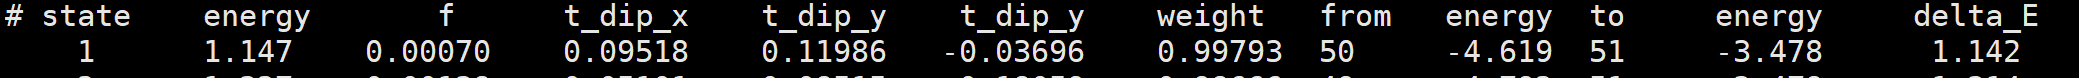

We can calculate the HOMO - LUMO and compare it to the results found in the single-point example. For reference, the HOMO - LUMO from that section is: XX. Here, looking at the output we see that there are three different `energy` values. However, only the last two are relevant for this calculation. We observe that the `from` value corresponds to an energy of `-4.619` where the `to` value corresponds to `-3.478`. The `from` value is equivalent to the initial occupied orbital (HOMO) and the `to` value is equivalent to the initial virtual (or unoccupied) orbital (LUMO).

In [1]:
print("The HOMO - LUMO gap is: " + str(-4.619 - (-3.478)))

The HOMO - LUMO gap is: -1.1409999999999996


This value is quite a deal greater in magnitude as compared to the single-point value that was calculated.

## Part Three: Plotting the Absorption Spectrum

For this last part, we are told to use the `convolution.py` function, which I ended up struggling to run. 

In [2]:
#! /usr/bin/env python
""" This script convolutes the calculated oscillator strengts for different snapshots in a MD trajectory and plot the average spectrum.
Usage:
convolution.py -sigma 0.05 -n 2 -nm True -write True
Use the sigma flag to change the sigma parameter of the gaussian functions
used in the convolution. If you use the n flag you imply that you want to plot
only the spectrum of snapshot number n (starting from 0)instead of an average
over all strucutures.
Use the nm to obtain a plot in nm scale.
You can choose to write the coordinates obtained from the convolution with the write flag.
"""

import argparse
import glob

import matplotlib.pyplot as plt
import numpy as np

from nanoqm.analysis import convolute

sigma = 0.1
n = 2


def main(sigma, n, nm, write):
    # Check output files
    files = sorted(glob.glob('output_*.txt'))

    if n is None:
        # Define energy window for the plot
        energy = np.loadtxt(files[0], usecols=1)
        emax = energy[-1] + 0.5
        emin = energy[0] - 0.5
        x_grid = np.linspace(emin, emax, 800)
        y_grid = np.empty([x_grid.size, 0])
        for f in files:
            # Read transition energies and oscillator strengths
            data = np.loadtxt(f, usecols=(1, 2))
            # Convolute each spectrum at a time
            ys = convolute(data[:, 0], data[:, 1], x_grid, sigma)
            # Stack the spectra in a matrix
            y_grid = np.column_stack((y_grid, ys))
        # Average them
        y_grid = np.sum(y_grid, axis=1) / len(files)

    else:
        # Read transition energies and oscillator strengths
        data = np.loadtxt(files[n], usecols=(1, 2))
        # Define energy window for the plot
        emax = data[-1, 0] + 0.5
        emin = data[0, 0] - 0.5
        x_grid = np.linspace(emin, emax, 800)
        # Convolute
        y_grid = convolute(data[:, 0], data[:, 1], x_grid, sigma)

    # Convert in nm if request
    if nm:
        x_grid = 1240/x_grid

    # plot
    plt.plot(x_grid, y_grid)
    if nm:
        plt.xlabel('Wavelenght[nm]')
    else:
        plt.xlabel('Energy[eV]')
    plt.ylabel('Oscillator strength')
    plt.show()

    # Write convoluted coordinates if request
    if write:
        output = np.empty((len(x_grid), 2))
        output[:, 0] = x_grid
        output[:, 1] = y_grid
        fmt = '{:^10s}{:^10s}'
        if nm:
            header = fmt.format(
                'nm', 'f')
            output = output[::-1]
        else:
            header = fmt.format(
                'eV', 'f')
        np.savetxt('convolution.txt', output,
                   fmt='%11.3f %10.5f', header=header)


def read_cmd_line(parser):
    """
    Parse Command line options.
    """
    args = parser.parse_args()

    attributes = ['sigma', 'n', 'nm', 'write']

    return [getattr(args, p) for p in attributes]


# ============<>===============
if __name__ == "__main__":

    msg = """convolution.py -sigma <sigma parameter of the gaussian functions> -n <plot only the spectrum of structure n>
    -nm <plot in nm> -write <write the coordinates from the convolution>"""

    parser = argparse.ArgumentParser(description=msg)
    parser.add_argument('-sigma', default=0.1, type=float,
                        help='Sigma parameter of the gaussian functions')
    parser.add_argument('-n', default=None, type=int,
                        help='Plot only the spectrum of the strucure number n')
    parser.add_argument('-nm', default=False, type=bool,
                        help='Convert the x axis in nm')
    parser.add_argument('-write', default=False, type=bool,
                        help='Write the coordinates from the convolution')

    main(*read_cmd_line(parser))


ModuleNotFoundError: No module named 'nanoqm'